<a href="https://colab.research.google.com/github/Mathieu-Allaire/Linear-Regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
plt.style.use("ggplot")

# Source of data - https://www.stat.cmu.edu/~larry/all-of-statistics/=data/temp.dat
# I am hosting data in Google spreadsheet
path_to_data="https://docs.google.com/spreadsheets/d/1pxZfbMEYwLoFQ2z0OVUxhz-5WY4w-GaZwEOUDPTA7iM/export?format=csv"
df=pd.read_csv(path_to_data,index_col=0)

In [2]:
df.shape

(56, 3)

# TASK 1: Explore Data using pandas


1.   What is the average temperature across all the cities?
2.   What are the northern and southern cities?
3.   Add a column where the `JanTemp` column has been converted to Celcius scale. 



In [ ]:
# df[df["Lat"]==df["Lat"].max()]
df["JanTempC"]=(df["JanTemp"]-32)*5/9
df.sample(3).round(1)

,JanTemp,Lat,Long,JanTempC
City,,,,
"Harrisburg, PA",24,40.9,77.8,-4.4
"Charleston, SC",38,33.3,80.8,3.3
"Jacksonville, FL",45,31.0,82.3,7.2


# Plot the two variables of interest

Text(0, 0.5, 'Temp in January')

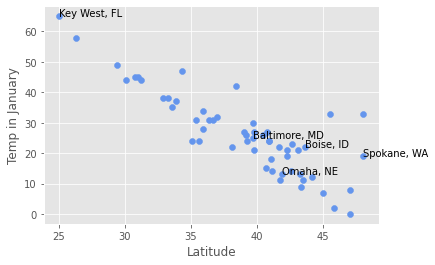

In [ ]:
# better way to call matplotlib; ax is now our `handle`
fig, ax = plt.subplots()

ax.scatter(
    x = df["Lat"],
    y = df["JanTemp"],
    c = "cornflowerblue"
)

# Sample 5 rows from data at random, loop through and add city names as labels
for i,r in df.sample(5).iterrows():
  ax.annotate(i,(r["Lat"],r["JanTemp"]))

# Label axes
ax.set_xlabel("Latitude")
ax.set_ylabel("Temp in January")

# TASK 2: Guess Line of Best Fit

Take guesses on the slope and intercept that would define your best guess at the Line of Best Fit for this data

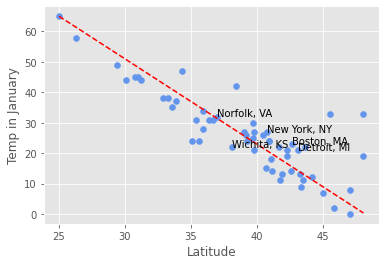

In [ ]:
# take guesses at what the slope and intercept that would define line of best fit
A_GUESS = -2.8
B_GUESS = 135

# Linear function 
f_guess = lambda x: A_GUESS*x + B_GUESS

# use numpy to make an array of 100 evenly spaced latitudes to test our guessed line of best fit
x = np.linspace(
    df["Lat"].min(),
    df["Lat"].max(),
    100
)

# start plot again, but draw guessed line of best fit
fig, ax = plt.subplots()

ax.scatter(
    x = df["Lat"],
    y = df["JanTemp"],
    c = "cornflowerblue"
)

# Sample 5 rows from data at random, loop through and add city names as labels
for i,r in df.sample(5)[["Lat","JanTemp"]].iterrows():
  ax.annotate(i,(r["Lat"],r["JanTemp"]))

# Label axes
ax.set_xlabel("Latitude")
ax.set_ylabel("Temp in January")

# plot guessed line of best fit
ax.plot(x,f_guess(x),c="red",linestyle="dashed")

# TASK 3: Evaluate your Line of Best of Fit

1.  Add a column to `df` that gives the predicted temperature for each city based on your guessed line of best fit `f_guess`
2.  Add a column that gives the square of the error between your guessed temperature, and the actual temperature
3.  Calculate the **Root Mean Square Error** (RMSE) as a measure of how **good** your guessed line of best fit is

In [ ]:
np.linspace(-3,-2,12)

array([-3.        , -2.90909091, -2.81818182, -2.72727273, -2.63636364,
       -2.54545455, -2.45454545, -2.36363636, -2.27272727, -2.18181818,
       -2.09090909, -2.        ])

# TASK 4: Least Squares Regression

1.  Add code that generates a linearly spaced array of 100 possible values of `slope` to test out
2.  Add code that generates a linearly spaced array of 100 possible values of `intercept` to test out
3.  Write a set of two nested loops, which tests all possible values of `slope` and `intercept`. In each iteration, calculate **RMSE**, and save in dict `results`, where key is (`slope`,`intercept`)


In [ ]:
# Add code that generates a linearly spaced array of 100 possible values of `slope` to test out
min_slope = 
max_slope = 
slopes = np.linspace(min_slope,max_slope,100)

# Add code that generates a linearly spaced array of 100 possible values of `intercept` to test out
min_intercept = 
max_intercept = 
intercepts=np.linspace(min_intercept,max_intercept,100)

# Write a set of two nested loops, which tests all possible values of `slope` and `intercept`. 
# In each iteration, calculate **RMSE**, and save in dict `results`, where key is (`slope`,`intercept`)

results={}
# iterate through all values of slope
for ... :
  # iterate through all values of intercept (keeping slope constant)
  for ... :
    # calculate RMSE for each a,b
    ...
    RMSE = 
    # save this value of RMSE to `results` dictionary, where keys are current value of slope and intercept
    results[(a,b)] = RMSE

# get the key that corresponds to the minimum RMSE
A_OPTIMAL,B_OPTIMAL = min(results, key = results.get)

In [ ]:
# nothing to change in this code block

# start plot again, but draw guessed line of best fit, as well as 
# the `optimal` line of best fit 
fig, ax = plt.subplots()

ax.scatter(
    x = df["Lat"],
    y = df["JanTemp"],
    c = "cornflowerblue"
)

# Sample 5 rows from data at random, loop through and add city names as labels
for i,r in df.sample(5)[["Lat","JanTemp"]].iterrows():
  ax.annotate(i,(r["Lat"],r["JanTemp"]))

# Label axes
ax.set_xlabel("Latitude")
ax.set_ylabel("Temp in January")

# plot guessed line of best fit
ax.plot(x,f_guess(x),c="red",linestyle="dashed",label="guess")

# plot `optimal` line of best fit
f_optimal = lambda x: A_OPTIMAL*x + B_OPTIMAL
ax.plot(
    x,
    f_optimal(x),
    c="green",
    linestyle="dashed",
    label="optimal fit"
)
plt.legend()